### Imports

In [28]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import PIL
from IPython.display import Image
from IPython.display import Video

### API Server

In [10]:
#apiServer = "http://localhost:8080/api/v1"
apiServer = "http://x570-test.local:8080/api/v1"

### Input Video

In [47]:
video = "sample_video_720p.mp4"
Video(video)

### Classify Request (remote)

In [12]:
files = {'video': (video, open(video, 'rb') ) }
model = "yolov3_adas_pruned_0_9"

# make request
response = requests.post(apiServer + '/videos/yolo-v3?model=' + model, files=files)
response.status_code

200

In [111]:
print("Respnse: " + response.content[:256].decode("utf-8")  + " ...")

Respnse: {"data":{"frames":[{"frame":1,"bboxes":[{"label":0,"x":408.021,"y":335.819,"width":72.3738,"height":42.1944,"score":0.918903},{"label":0,"x":438.482,"y":304.93,"width":16.5857,"height":11.9411,"score":0.591831},{"label":0,"x":438.329,"y":315.479,"width":16 ...


### Inspect Results:

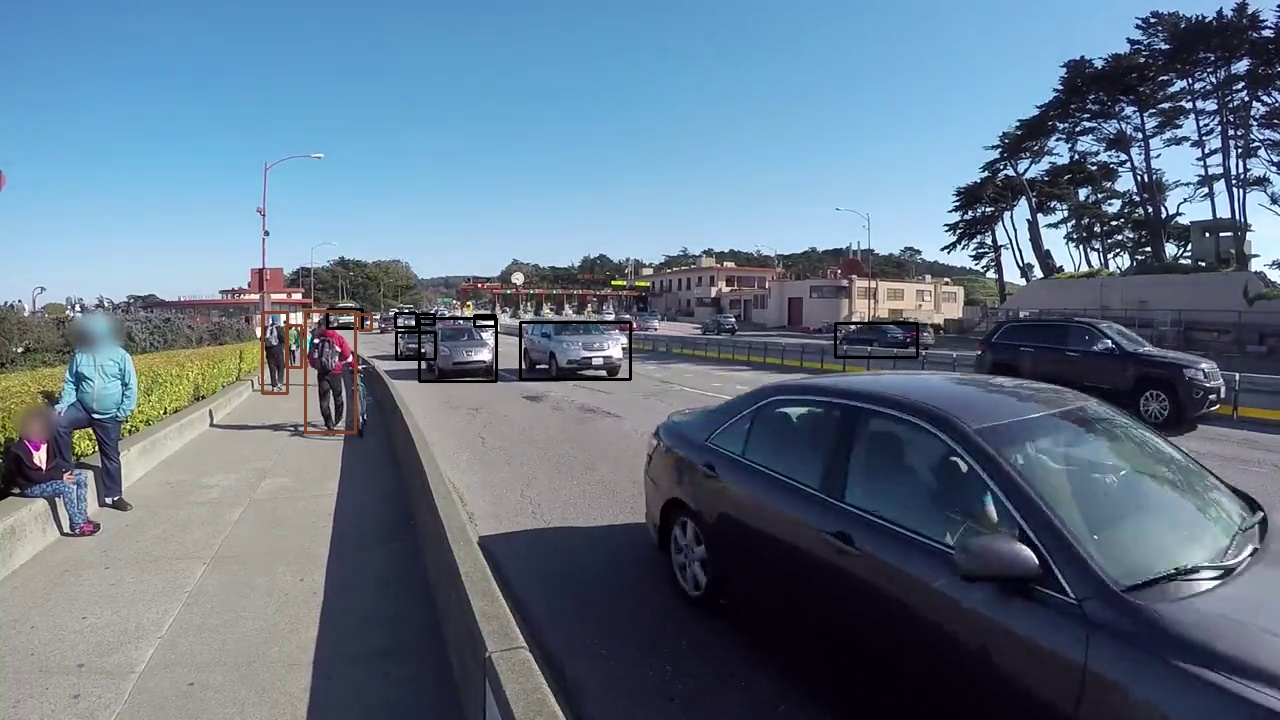

In [117]:
import cv2
from IPython.display import display, Image

jsonResponse = json.loads(response.content)
jsonFrames = jsonResponse['data']['frames']


# Convert Labels to Color
def labelToColor(label):
    return ( ((label / 3) % 3) * 127 , ((label / 2) % 3) * 127, ((label / 1) % 3) * 127 )

# Play Video with Yolo V3 detection result
cvVideo = cv2.VideoCapture(video)
display_handle=display(None, display_id=True)
frameNr = 0
try:
    while True:
        ret, frame = cvVideo.read()
        if ret == False:
            break
    
        if len(jsonFrames) <= frameNr:
            break
            
        frameInfo = jsonFrames[frameNr]
        frameNr = frameNr + 1
        for bbox in frameInfo['bboxes']:
            pos = (int(bbox['x']), int(bbox['y']))
            size = (int(bbox['x']) + int(bbox['width']), int(bbox['y']) + int(bbox['height']))
            color = labelToColor(bbox['label']) # (255,0,0)
            cv2.rectangle(frame, pos, size, color, 2)
        
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        
except KeyboardInterrupt:
    pass

finally:
    cvVideo.release()